## Melting the Data

In [2]:
import pandas as pd

df1 = pd.read_excel("Book2.xlsx",sheet_name='Sheet2')

In [3]:
df1.head()

,Year,1,2,3,4,5,6,7,8,9,10
0,2012,Alternative Rock,Pop,Alternative Rock,Pop,Electronic,Pop,Pop,Raggae,Rap,Pop
1,2013,Rap,Funk,Alternative Rock,Electronic,Hip Hop,Pop,Alternative Rock,R&B,Country,Pop
2,2014,Soul,Pop,R&B,Rap,Pop,R&B,Raggae,Pop,Pop,Pop
3,2015,Funk,Alternative Rock,Pop,Hip Hop,Pop,Pop,Pop,Hip Hop,Hip Hop,Electronic
4,2016,Pop,Pop,Hip Hop,Pop,Alternative Rock,Hip Hop,Alternative Rock,Electronic,Pop,Electronic


In [4]:
df2 = df1.melt(id_vars=['Year'], value_name='Genre')

print(df2.head())

df_clean = df2.drop(columns=['variable'])
df_clean.head()

   Year variable             Genre
0  2012        1  Alternative Rock
1  2013        1               Rap
2  2014        1              Soul
3  2015        1              Funk
4  2016        1               Pop


,Year,Genre
0,2012,Alternative Rock
1,2013,Rap
2,2014,Soul
3,2015,Funk
4,2016,Pop


## The Piechart

In [5]:
grouped = df_clean.groupby(['Year', 'Genre']).size().reset_index(name='Count')
grouped.head()

,Year,Genre,Count
0,2012,Alternative Rock,2
1,2012,Electronic,1
2,2012,Pop,5
3,2012,Raggae,1
4,2012,Rap,1


In [6]:
selected_year = 2012
year_subset = grouped[grouped['Year'] == selected_year]
year_subset.head()

,Year,Genre,Count
0,2012,Alternative Rock,2
1,2012,Electronic,1
2,2012,Pop,5
3,2012,Raggae,1
4,2012,Rap,1


In [7]:
import matplotlib.pyplot as plt

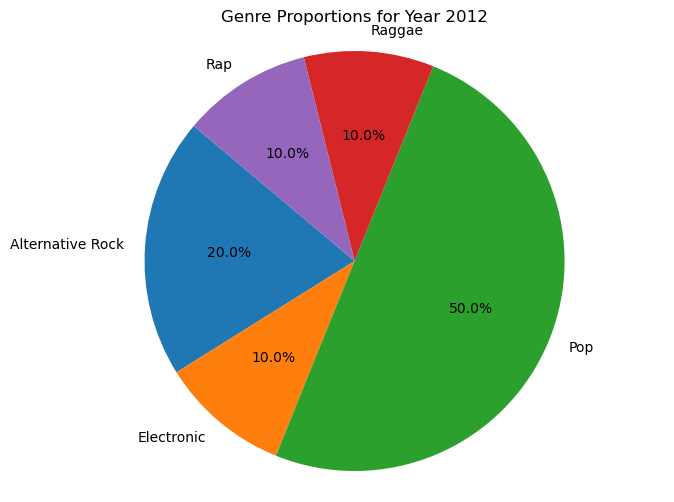

In [8]:
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(year_subset['Count'], labels=year_subset['Genre'], autopct='%1.1f%%', startangle=140)
plt.title(f"Genre Proportions for Year {selected_year}")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [9]:
grouped2 = df_clean.groupby(['Genre']).size().reset_index(name='Count')
grouped2.head()

,Genre,Count
0,Alternative Rock,8
1,Country,5
2,Electronic,10
3,Funk,2
4,Hip Hop,10


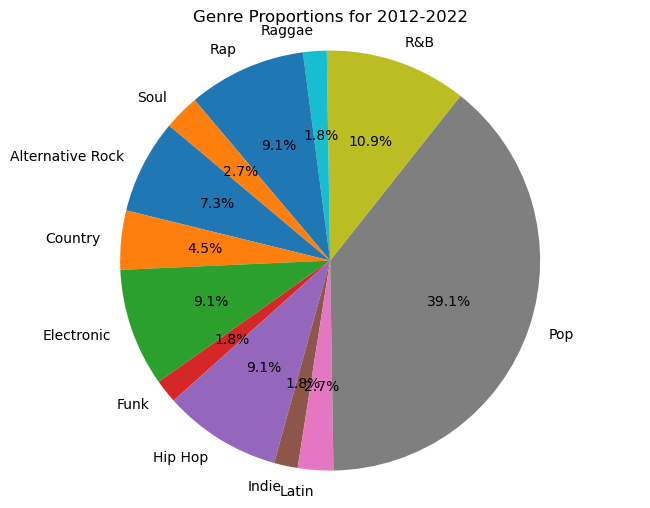

In [12]:
plt.figure(figsize=(8, 6))
plt.pie(grouped2['Count'], labels=grouped2['Genre'], autopct='%1.1f%%', startangle=140)
plt.title(f"Genre Proportions for 2012-2022")
plt.axis('equal')
plt.show()